## Anomaly Detection 
Detecting anomaly in tweet frequencies. I will look at a few examples from the 'realtweets' dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/external/realTweets/Twitter_volume_GOOG.csv')
df.shape

(15842, 2)

In [3]:
df.head(5)

,timestamp,value
0,2015-02-26 21:42:53,35
1,2015-02-26 21:47:53,41
2,2015-02-26 21:52:53,32
3,2015-02-26 21:57:53,36
4,2015-02-26 22:02:53,32


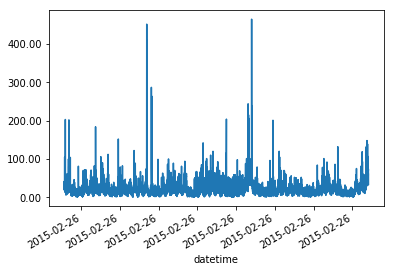

In [10]:
# graph data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df['datetime'] = pd.to_datetime(df['timestamp'],
                                   format="%Y.%m.%d %H:%M:%S.%f")

df.set_index('datetime', inplace=True)

ax = df['value'].plot()

ticklabels = df.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

In [5]:
df.head(5)

,timestamp,value
datetime,,
2015-02-26 21:42:53,2015-02-26 21:42:53,35
2015-02-26 21:47:53,2015-02-26 21:47:53,41
2015-02-26 21:52:53,2015-02-26 21:52:53,32
2015-02-26 21:57:53,2015-02-26 21:57:53,36
2015-02-26 22:02:53,2015-02-26 22:02:53,32


In [6]:
#split datetime into hour minute second values
import datetime
df['datetime'] = pd.to_datetime(df['timestamp'])
df['hour'], df['minute'], df['second'] = df['datetime'].dt.hour, df['datetime'].dt.minute, df['datetime'].dt.second
df.head(5)

,timestamp,value,datetime,hour,minute,second
datetime,,,,,,
2015-02-26 21:42:53,2015-02-26 21:42:53,35,2015-02-26 21:42:53,21,42,53
2015-02-26 21:47:53,2015-02-26 21:47:53,41,2015-02-26 21:47:53,21,47,53
2015-02-26 21:52:53,2015-02-26 21:52:53,32,2015-02-26 21:52:53,21,52,53
2015-02-26 21:57:53,2015-02-26 21:57:53,36,2015-02-26 21:57:53,21,57,53
2015-02-26 22:02:53,2015-02-26 22:02:53,32,2015-02-26 22:02:53,22,2,53


In [7]:
from sklearn.model_selection import train_test_split
decision = df[['value']]
features = df[['hour', 'minute', 'second']]
train, test, train_d, test_d = train_test_split(features,
                                                decision,
                                                test_size = 0.2,
                                                random_state = 14)

In [8]:
# isolation forest for finding anomalies
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=14)
clf.fit(train)

# predictions
y_pred_train = clf.predict(train)
y_pred_test = clf.predict(test)

In [9]:
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy: 0.9062795834648154


Overall, it seems that isolation forest did a pretty good job of accurately predicting the values in the model. One thing that may be worth considering is how to visualize this process so that it can be easily seen which outliers are being predicted and which are being missed by the model.

In future work, it may also be necessary to add additional features such as day of the week or a generalized time of day in order to get a better idea of when outliers may be present. 